In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plt

import keras_tuner as kt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
train_index = np.random.randint(0,50000, size = 10000)
test_index = np.random.randint(0,10000, size = 2000)

train_x = X_train[train_index]
train_y = y_train[train_index]

test_x = X_test[test_index]
test_y = y_test[test_index]

In [4]:
# normalising the values
X_train = X_train / 255
X_test = X_test / 255

train_x = train_x /255
test_x = test_x /255

In [5]:
kt.HyperParameters()

In [6]:
def generateModel(hp):
    # Hyperparameter Tuning
    model2 = Sequential(name="Image_Recognition_Model")
    model2.add(Conv2D(hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),(hp.Choice('conv_1_kernel', values = [3,3])), activation="relu", input_shape = (32,32,3)))
    model2.add(MaxPooling2D((2,2)))
    model2.add(Dropout(0.2)) #  To prevent model from overfitting, random neurons will be dropped out randomly
    model2.add(Conv2D(hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),(hp.Choice('conv_1_kernel', values = [3,3])), activation="relu", input_shape = (32,32,3)))
    model2.add(MaxPooling2D((2,2)))
    model2.add(Dropout(0.2))
    model2.add(Flatten()) # Flatten all dimensions into 1D array to be filtered by dense layer
    model2.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=64, step=16), activation="relu"))
    model2.add(Dense(10, activation="softmax" )) # 10 Layers for 10 classes

    model2.compile(
        optimizer="adam", 
        loss="sparse_categorical_crossentropy", 
        metrics=['accuracy']
    )

    return model2


In [7]:
#importing random search
from kerastuner import RandomSearch
#creating randomsearch object
tuner = RandomSearch(generateModel, objective='val_accuracy', max_trials = 5)
# search best parameter
tuner.search(train_x,train_y,epochs=3, validation_data =(train_x,train_y))

Trial 5 Complete [00h 01m 19s]
val_accuracy: 0.5367000102996826

Best val_accuracy So Far: 0.567799985408783
Total elapsed time: 00h 05m 40s
INFO:tensorflow:Oracle triggered exit


In [9]:
model2=tuner.get_best_models(num_models=1)[0]
#summary of best model
model2.summary()

Model: "Image_Recognition_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 112)       3136      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 112)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 112)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 112)       113008    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 112)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 1

In [12]:
history = model2.fit(test_x,test_y,epochs=10,validation_split=0.1,initial_epoch=3)

Epoch 4/10
57/57 [==============================] - 4s 68ms/step - loss: 0.3002 - accuracy: 0.9078 - val_loss: 1.5647 - val_accuracy: 0.5800
Epoch 5/10
57/57 [==============================] - 4s 73ms/step - loss: 0.2506 - accuracy: 0.9200 - val_loss: 1.5248 - val_accuracy: 0.6050
Epoch 6/10
57/57 [==============================] - 4s 71ms/step - loss: 0.2430 - accuracy: 0.9294 - val_loss: 1.8419 - val_accuracy: 0.5350
Epoch 7/10
57/57 [==============================] - 4s 69ms/step - loss: 0.2142 - accuracy: 0.9367 - val_loss: 1.6973 - val_accuracy: 0.6000
Epoch 8/10
57/57 [==============================] - 4s 69ms/step - loss: 0.1751 - accuracy: 0.9528 - val_loss: 1.7534 - val_accuracy: 0.5550
Epoch 9/10
57/57 [==============================] - 4s 66ms/step - loss: 0.1504 - accuracy: 0.9572 - val_loss: 1.7444 - val_accuracy: 0.5900
Epoch 10/10
57/57 [==============================] - 4s 73ms/step - loss: 0.1478 - accuracy: 0.9589 - val_loss: 1.7600 - val_accuracy: 0.6300


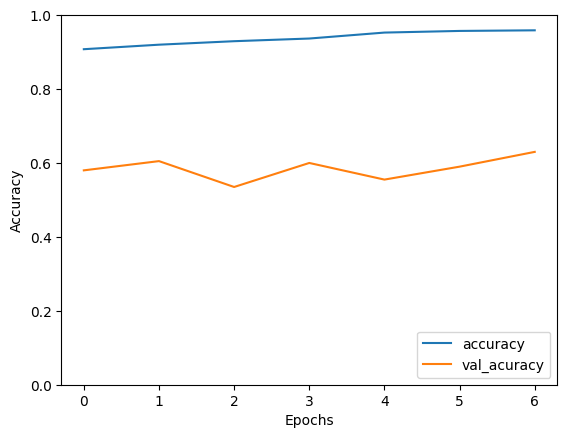

In [19]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label='val_acuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

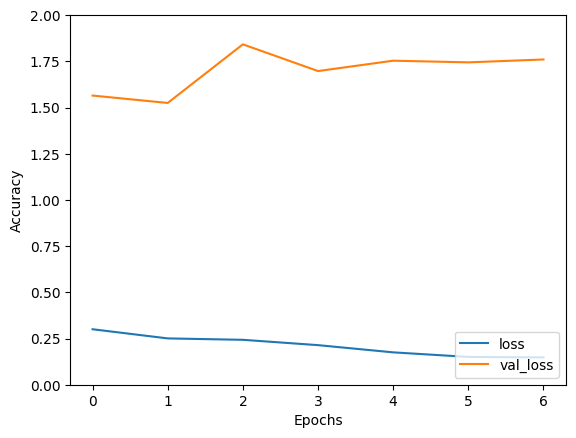

In [18]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history["val_loss"], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,2])
plt.legend(loc = 'lower right')

In [20]:
model2.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


<h1> Python Application <h1>

In [32]:
import cv2

def ImageRead(imagePath):

    result = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

    img = cv2.imread(imagePath)
    plt.imshow(img)
    plt.show()
    resize = tf.image.resize(img,(32,32))
    predictions = model2.predict(np.expand_dims(resize/255, 0)) 
    yhat = tf.nn.softmax(predictions[0])
    print(yhat)
    # print(" Result is {classes}".format(classes=result[yhat]))
    


In [67]:
# To use function, provide the path of the image locally.

def ImageRead2(image_path):

    class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

    img = tf.keras.utils.load_img(
        image_path, target_size=(32, 32)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model2.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

In [72]:
ImageRead2("truck.jpg")

1/1 [==============================] - 0s 23ms/step
This image most likely belongs to automobile with a 23.20 percent confidence.


In [ ]:
ImageRead2("catdog.jpg")

In [ ]:
ImageRead2("dog.jpg")

In [ ]:
ImageRead2("tianren.jpg")